In [1]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.cluster import KMeans

In [8]:
from sklearn.decomposition import PCA

In [9]:
from sklearn.metrics import silhouette_score

In [10]:
df = pd.read_csv('customer_data.csv')

In [11]:
print("Shape:", df.shape)

Shape: (200, 5)


In [12]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [13]:
print("\nDuplicates:", df.duplicated().sum())


Duplicates: 0


In [15]:
print("\nData types:\n", df.dtypes)


Data types:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [16]:
print("\nSummary statistics:\n", df.describe())


Summary statistics:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [19]:
df.drop(columns=["CustomerID"], inplace=True)  # Remove CustomerID as it's not needed

In [21]:
df.drop_duplicates(inplace=True)

# Fill NaN values only in numeric columns with their respective mean values
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

In [24]:
print(df.dtypes)


Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [25]:
df_numeric = df.select_dtypes(include=[np.number])
scaled_data = scaler.fit_transform(df_numeric)


In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

scaled_data = scaler.fit_transform(df)


In [27]:
df = df.apply(pd.to_numeric, errors='coerce')  # Converts non-numeric to NaN
df.fillna(0, inplace=True)  # Replace NaN values with 0
scaled_data = scaler.fit_transform(df)


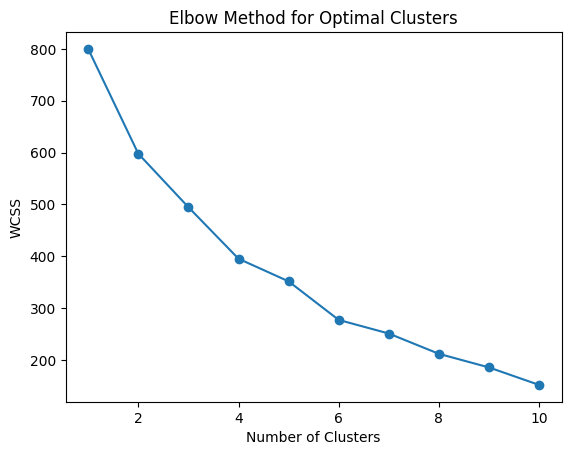

In [28]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


In [29]:
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f'Clusters: {i}, Silhouette Score: {score}')


Clusters: 2, Silhouette Score: 0.2776035125578272
Clusters: 3, Silhouette Score: 0.2576199805135528
Clusters: 4, Silhouette Score: 0.29010917402310876
Clusters: 5, Silhouette Score: 0.27191023466188324
Clusters: 6, Silhouette Score: 0.3347543475669217
Clusters: 7, Silhouette Score: 0.3457397879257699
Clusters: 8, Silhouette Score: 0.3727647594212929
Clusters: 9, Silhouette Score: 0.3876146244442297
Clusters: 10, Silhouette Score: 0.42076374869477745


In [30]:
optimal_clusters = 3  # Adjust based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


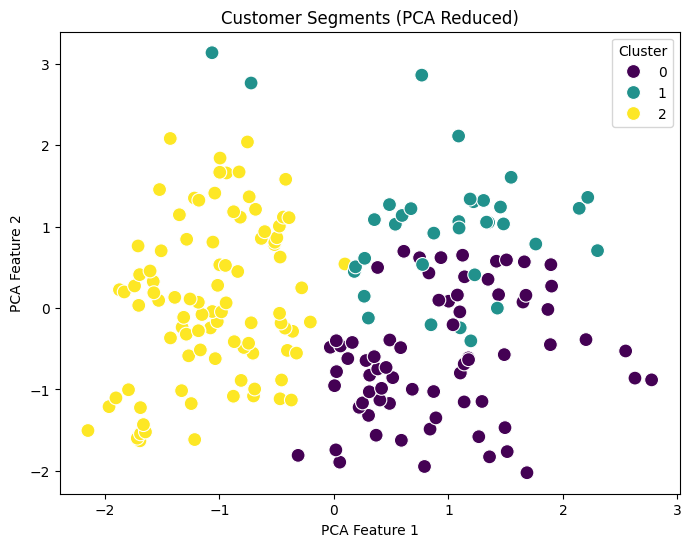

In [31]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Customer Segments (PCA Reduced)')
plt.legend(title='Cluster')
plt.show()


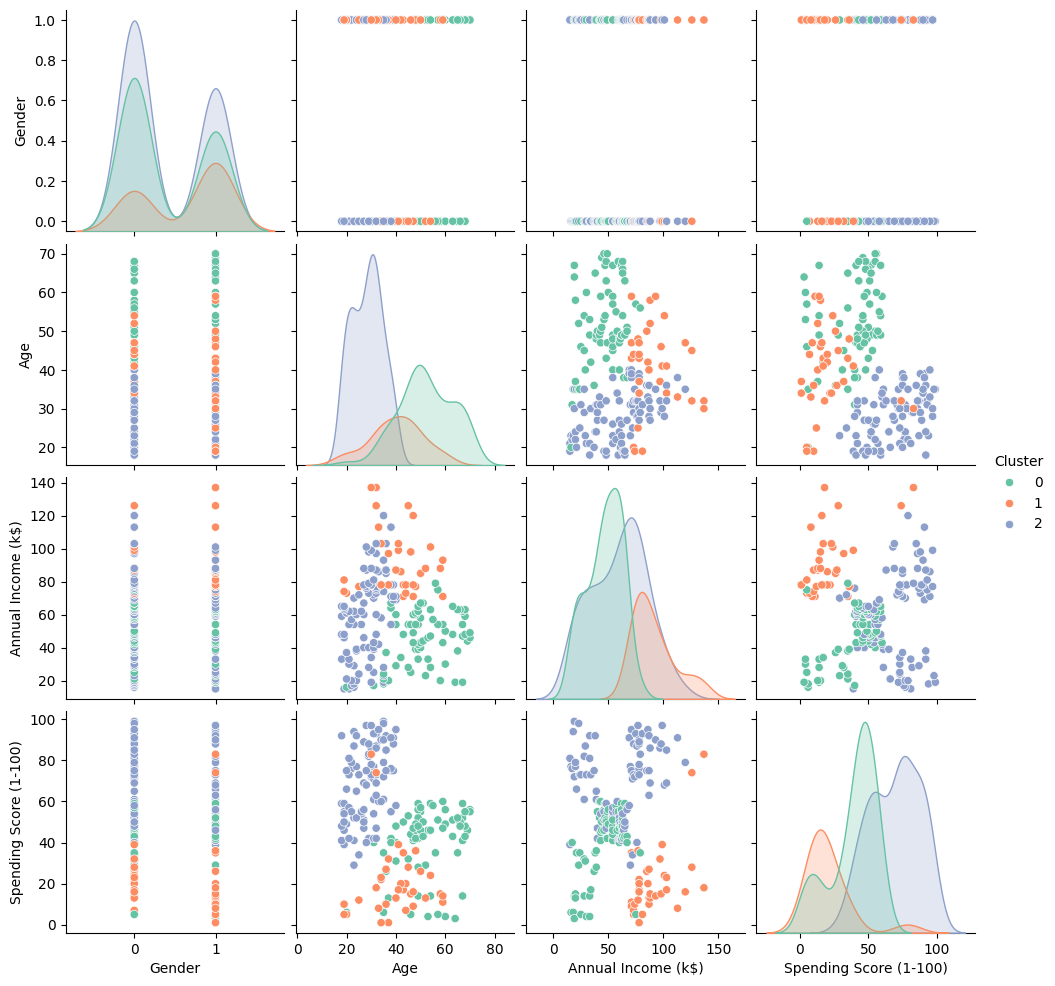

In [32]:
sns.pairplot(df, hue='Cluster', palette='Set2')
plt.show()


In [33]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=df.columns[:-1])
print("Cluster Centers:\n", cluster_df)


Cluster Centers:
      Gender        Age  Annual Income (k$)  Spending Score (1-100)
0  0.394366  52.169014           46.676056               39.295775
1  0.628571  40.228571           91.342857               20.628571
2  0.404255  28.276596           59.585106               69.446809


In [34]:
print(df.groupby('Cluster').mean())  # Check characteristics of each cluster


           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.394366  52.169014           46.676056               39.295775
1        0.628571  40.228571           91.342857               20.628571
2        0.404255  28.276596           59.585106               69.446809


In [35]:
df.to_csv("customer_data_with_clusters.csv", index=False)
